### Import Libraries and Dependencies

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSV as Pandas DataFrame

In [2]:
# Read in csv
csv_path = Path("tsla_google_finance.csv")
tsla_df = pd.read_csv(csv_path)
tsla_df.head()

,Date,Close
0,11/13/18,338.73
1,11/14/18,344.00
2,11/15/18,348.44
3,11/16/18,354.31
4,11/19/18,353.47


### Index Data by `Date`

In [3]:
# Set `Date` as index
# be consistent with resaving as the same variable or simply usuing inplace=True
tsla_df.set_index(tsla_df['Date'], inplace=True)
tsla_df = tsla_df.drop(columns=['Date'])
tsla_df.head()


,Close
Date,
11/13/18,338.73
11/14/18,344.00
11/15/18,348.44
11/16/18,354.31
11/19/18,353.47


### Assess and Clean Data

In [4]:
# Check for nulls
tsla_df.isnull()
# tsla_df.isnull().sum()

# Drop missing values
tsla_df = tsla_df.dropna()

# Validate no more missing values
tsla_df.isnull().sum()

Close    0
dtype: int64

### Calculate Daily Returns

In [5]:
# Calculate daily returns
tsla_df['Daily Returns'] = tsla_df.pct_change(1)
tsla_df.head(20)





,Close,Daily Returns
Date,,
11/13/18,338.730,NaN
11/14/18,344.000,0.015558
11/15/18,348.440,0.012907
11/16/18,354.310,0.016847
11/19/18,353.470,-0.002371
11/20/18,347.490,-0.016918
11/21/18,338.190,-0.026763
11/23/18,325.830,-0.036548
11/26/18,346.000,0.061903


### Sort the DataFrame by `Close` to Get Records with Top Daily Returns

In [6]:
# Sort data by `Close` in descending order
# to set the order as ascending ot decending use -> ascending=True pr ascending=False
tsla_df = tsla_df.sort_values(['Close'], ascending=False)
tsla_df.head()

# you can also sort by index -> tsla_df.sort_index(ascending=False)

,Close,Daily Returns
Date,,
12/13/18,376.79,0.027796
12/11/18,366.76,0.004409
12/12/18,366.60,-0.000436
12/14/18,365.71,-0.029406
12/10/18,365.15,0.020072


### Slice Out 5 Records

In [7]:
# Slice out top 5
tsla_df = tsla_df.iloc[:5]
tsla_df

,Close,Daily Returns
Date,,
12/13/18,376.79,0.027796
12/11/18,366.76,0.004409
12/12/18,366.60,-0.000436
12/14/18,365.71,-0.029406
12/10/18,365.15,0.020072


### Plot Top 5 Performing Days for TSLA Daily Returns

<Axes: xlabel='Date'>

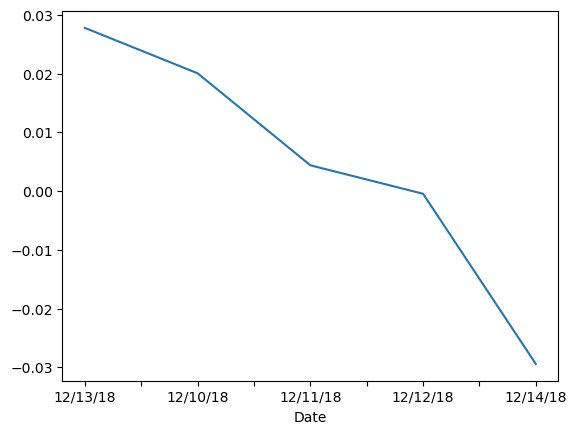

In [11]:
# Plot top 5 performing days
tsla_df = tsla_df.sort_values(['Daily Returns'], ascending=False)
tsla_df.iloc[:5]
tsla_df['Daily Returns'].plot()

<Axes: xlabel='Date'>

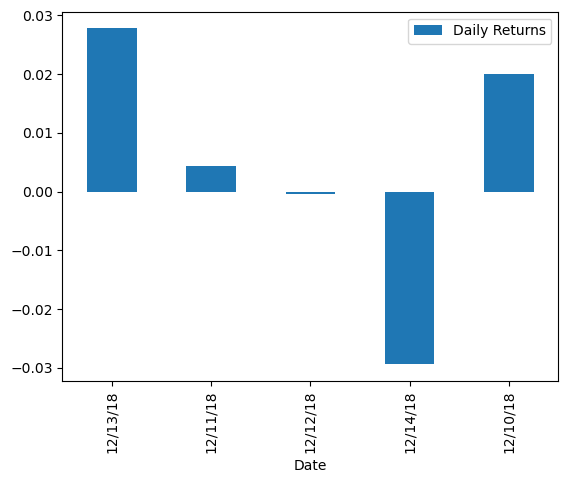

In [9]:
# Alternatively, visualizing the returns as a bar chart:
tsla_df.plot(kind='bar')